In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('/content/tax.csv' , usecols=['Postcode' , 'Average total business income' , 'Average total business expenses'])

In [3]:
df.head()

,Postcode,Average total business income,Average total business expenses
0,2000,210901,222191
1,2006,69983,48971
2,2007,575099,639499
3,2008,53329,32173
4,2009,237539,222993


In [4]:
x=df[['Average total business income' , 'Average total business expenses']]

In [8]:
from sklearn.cluster import KMeans

In [5]:
clusters= pd.DataFrame()

In [6]:
inertia=[]

In [7]:
clusters['cluster_range']= range(1,15)

In [9]:
for k in clusters['cluster_range']:
  kmeans=KMeans(n_clusters=k).fit(x)
  inertia.append(kmeans.inertia_)

In [10]:
clusters['inertia']= inertia

In [11]:
clusters

,cluster_range,inertia
0,1,1.333516e+13
1,2,7.063394e+12
2,3,3.718740e+12
3,4,2.341856e+12
4,5,1.714920e+12
5,6,1.225857e+12
6,7,9.422735e+11
7,8,7.488290e+11
8,9,6.346164e+11
9,10,5.639539e+11


In [13]:
import altair as alt

In [17]:
alt.Chart(clusters).mark_line().encode(alt.X('cluster_range') , alt.Y('inertia'))

alt.Chart(...)

In [19]:
optim_cluster= 4
kmeans=KMeans(random_state=42, n_clusters=optim_cluster)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [20]:
df['cluster2']= kmeans.predict(x)

In [21]:
df.head()

,Postcode,Average total business income,Average total business expenses,cluster2
0,2000,210901,222191,3
1,2006,69983,48971,0
2,2007,575099,639499,2
3,2008,53329,32173,0
4,2009,237539,222993,3


In [23]:
import seaborn as sns 

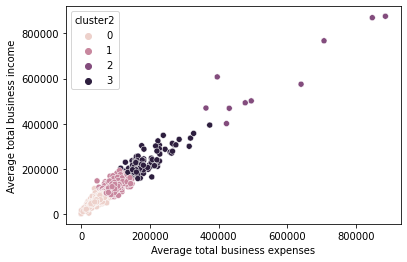

In [24]:
sns.scatterplot(x=df['Average total business expenses'] , y=df['Average total business income'] , hue=df['cluster2'])